# t-SNE

In [7]:
import pandas as pd
import numpy as np

data = pd.read_excel("data.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

X = data.drop("responder", axis=1)
y = data["responder"]

manjkajoce = X.isnull().sum()
meja = 0.2
for col in X.columns:
    if manjkajoce[col] > 0:
        # Imputiramo manjkajoče vrednosti
        if manjkajoce[col] < len(X)*meja:
            if X[col].dtype == 'float64':
                X[col].fillna(X[col].mean(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0], inplace=True)
        # ali pa stolpcec zavržemo
        else:
            X.drop(col, axis=1, inplace=True)

X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

0.1279180645942688

In [10]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

### Optimizacija (nic pametnega)

In [11]:
perplexity = np.arange(5, 70, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

## 3D

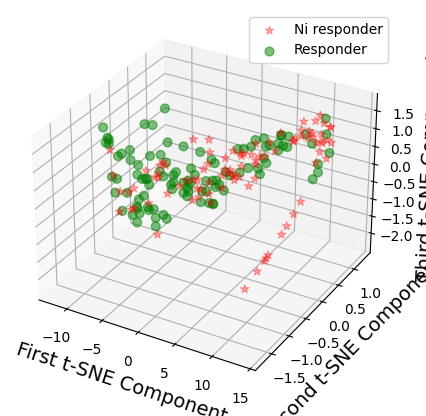

In [14]:

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)


ex_variance=np.var(X_tsne,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_tsne[:,0]
Yax = X_tsne[:,1]
Zax = X_tsne[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Ni responder',1:'Responder'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First t-SNE Component", fontsize=14)
ax.set_ylabel("Second t-SNE Component", fontsize=14)
ax.set_zlabel("Third t-SNE Component", fontsize=14)

ax.legend()
plt.show()